In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("TinySOL_metadata.csv")

In [4]:
df

,Path,Fold,Family,Instrument (abbr.),Instrument (in full),Technique (abbr.),Technique (in full),Pitch,Pitch ID,Dynamics,Dynamics ID,Instance ID,String ID (if applicable),Needed digital retuning
0,Brass/Bass_Tuba/ordinario/BTb-ord-F#1-pp-N-N.wav,2,Brass,BTb,Bass Tuba,ord,ordinario,F#1,30,pp,0,0,NaN,False
1,Brass/Bass_Tuba/ordinario/BTb-ord-G1-pp-N-R100...,4,Brass,BTb,Bass Tuba,ord,ordinario,G1,31,pp,0,0,NaN,True
2,Brass/Bass_Tuba/ordinario/BTb-ord-G#1-pp-N-T16...,3,Brass,BTb,Bass Tuba,ord,ordinario,G#1,32,pp,0,0,NaN,True
3,Brass/Bass_Tuba/ordinario/BTb-ord-A1-pp-N-T23d...,2,Brass,BTb,Bass Tuba,ord,ordinario,A1,33,pp,0,0,NaN,True
4,Brass/Bass_Tuba/ordinario/BTb-ord-A#1-pp-N-N.wav,0,Brass,BTb,Bass Tuba,ord,ordinario,A#1,34,pp,0,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Winds/Oboe/ordinario/Ob-ord-F6-ff-N-N.wav,2,Winds,Ob,Oboe,ord,ordinario,F6,89,ff,4,0,NaN,False
2909,Winds/Oboe/ordinario/Ob-ord-F#6-ff-N-T12u.wav,0,Winds,Ob,Oboe,ord,ordinario,F#6,90,ff,4,0,NaN,True
2910,Winds/Oboe/ordinario/Ob-ord-G6-ff-N-T16u.wav,0,Winds,Ob,Oboe,ord,ordinario,G6,91,ff,4,0,NaN,True
2911,Winds/Oboe/ordinario/Ob-ord-G#6-ff-N-N.wav,0,Winds,Ob,Oboe,ord,ordinario,G#6,92,ff,4,0,NaN,False


In [8]:
import pandas as pd
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


<ipython-input-9-4ded3e98e17b>:9: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y,sr=sr, x_axis='time', color='cyan')


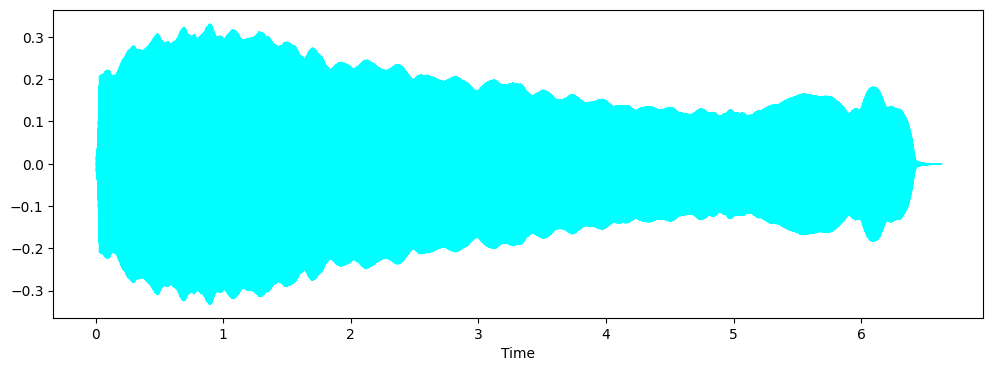

In [9]:
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
sample_num=3 #pick a file to display
#get the filename
filename=df["Path"].iloc[2911]
#define the beginning time of the signal
y,sr=librosa.load(str(filename)) #load the file
librosa.display.waveshow(y,sr=sr, x_axis='time', color='cyan')

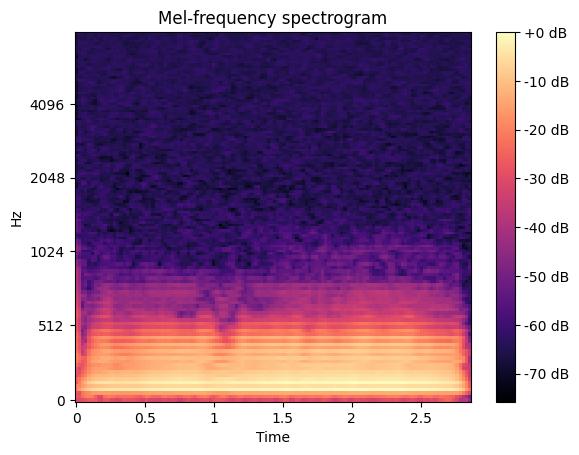

In [10]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
filename=df["Path"].iloc[1]
y, sr = librosa.load(str(filename))
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

In [13]:
from torch.utils.data import Dataset
import pandas as pd
import torchaudio
import torch
import os

In [15]:
df["Instrument (in full)"].unique()

array(['Bass Tuba', 'French Horn', 'Trombone', 'Trumpet in C',
       'Accordion', 'Cello', 'Contrabass', 'Viola', 'Violin',
       'Alto Saxophone', 'Bassoon', 'Clarinet in Bb', 'Flute', 'Oboe'],
      dtype=object)

In [16]:
len(df["Instrument (in full)"].unique())

14

In [18]:
# Function to extract MFCC features from audio files
def extract_features(file_path):
    try:
        y,sr = librosa.load(str(file_path))
        mfccs = librosa.feature.mfcc(y=y, sr=22050, n_mfcc=13)
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error encountered while processing {file_path}: {e}")
        return None
    return mfccs_processed

In [19]:
df['Features'] = df['Path'].apply(extract_features)

In [20]:
df.columns

Index(['Path', 'Fold', 'Family', 'Instrument (abbr.)', 'Instrument (in full)',
       'Technique (abbr.)', 'Technique (in full)', 'Pitch', 'Pitch ID',
       'Dynamics', 'Dynamics ID', 'Instance ID', 'String ID (if applicable)',
       'Needed digital retuning', 'Features'],
      dtype='object')

In [21]:
df = df.drop("String ID (if applicable)",axis = 1)


In [22]:
label_encoder = LabelEncoder()
df['Encoded_Labels'] = label_encoder.fit_transform(df['Instrument (in full)'])
y = pd.get_dummies(df['Encoded_Labels'])

In [23]:
df

,Path,Fold,Family,Instrument (abbr.),Instrument (in full),Technique (abbr.),Technique (in full),Pitch,Pitch ID,Dynamics,Dynamics ID,Instance ID,Needed digital retuning,Features,Encoded_Labels
0,Brass/Bass_Tuba/ordinario/BTb-ord-F#1-pp-N-N.wav,2,Brass,BTb,Bass Tuba,ord,ordinario,F#1,30,pp,0,0,False,"[-797.57477, 156.30415, 113.17482, 71.380844, ...",2
1,Brass/Bass_Tuba/ordinario/BTb-ord-G1-pp-N-R100...,4,Brass,BTb,Bass Tuba,ord,ordinario,G1,31,pp,0,0,True,"[-782.1774, 157.00809, 112.388664, 68.23102, 2...",2
2,Brass/Bass_Tuba/ordinario/BTb-ord-G#1-pp-N-T16...,3,Brass,BTb,Bass Tuba,ord,ordinario,G#1,32,pp,0,0,True,"[-738.6921, 199.0998, 117.12333, 48.109947, 8....",2
3,Brass/Bass_Tuba/ordinario/BTb-ord-A1-pp-N-T23d...,2,Brass,BTb,Bass Tuba,ord,ordinario,A1,33,pp,0,0,True,"[-781.1007, 157.59895, 111.65691, 66.03084, 23...",2
4,Brass/Bass_Tuba/ordinario/BTb-ord-A#1-pp-N-N.wav,0,Brass,BTb,Bass Tuba,ord,ordinario,A#1,34,pp,0,0,False,"[-746.4353, 205.41093, 117.67022, 44.789036, 2...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Winds/Oboe/ordinario/Ob-ord-F6-ff-N-N.wav,2,Winds,Ob,Oboe,ord,ordinario,F6,89,ff,4,0,False,"[-488.4036, -49.62769, -60.350292, 10.720539, ...",9
2909,Winds/Oboe/ordinario/Ob-ord-F#6-ff-N-T12u.wav,0,Winds,Ob,Oboe,ord,ordinario,F#6,90,ff,4,0,True,"[-550.10974, -35.110767, -64.31842, 27.303324,...",9
2910,Winds/Oboe/ordinario/Ob-ord-G6-ff-N-T16u.wav,0,Winds,Ob,Oboe,ord,ordinario,G6,91,ff,4,0,True,"[-515.90234, -31.423906, -68.231544, 14.612331...",9
2911,Winds/Oboe/ordinario/Ob-ord-G#6-ff-N-N.wav,0,Winds,Ob,Oboe,ord,ordinario,G#6,92,ff,4,0,False,"[-512.7066, -28.702572, -45.71644, 7.8040304, ...",9


In [24]:
X = np.array(df['Features'].tolist())

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(2330, 13)

In [27]:
# Reshape input data for Conv2D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [28]:
X_train[0].shape

(13, 1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(14, activation='softmax'))


In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
73/73 [==============================] - 2s 9ms/step - loss: 9.9460 - accuracy: 0.3270 - val_loss: 1.6945 - val_accuracy: 0.5849
Epoch 2/30
73/73 [==============================] - 0s 3ms/step - loss: 1.0272 - accuracy: 0.6940 - val_loss: 0.8026 - val_accuracy: 0.7547
Epoch 3/30
73/73 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.8099 - val_loss: 0.5741 - val_accuracy: 0.8165
Epoch 4/30
73/73 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.8386 - val_loss: 0.5713 - val_accuracy: 0.8079
Epoch 5/30
73/73 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8691 - val_loss: 0.4479 - val_accuracy: 0.8439
Epoch 6/30
73/73 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8850 - val_loss: 0.4306 - val_accuracy: 0.8525
Epoch 7/30
73/73 [==============================] - 0s 4ms/step - loss: 0.3103 - accuracy: 0.8923 - val_loss: 0.3537 - val_accuracy: 0.8714
Epoch 8/30
73/73 [==

In [31]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 4ms/step - loss: 0.2337 - accuracy: 0.9228


[0.23371630907058716, 0.9228130578994751]

In [39]:
model.save("Intru_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model


model = load_model('your_trained_model.h5')

# Function to preprocess a custom audio file
def preprocess_custom_audio(file_path):
    y,sr = librosa.load(str(file_path), sr=22050, mono=True)  # Adjust parameters as needed
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=22050, n_mels=128, hop_length=512)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mfccs = librosa.feature.mfcc(y=y, sr=22050, n_mfcc=13)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed,  mel_spectrogram

custom_file_path = df["Path"].iloc[0]

# Preprocess the audio file
feature_extracted, mel_spectrogram = preprocess_custom_audio(custom_file_path)
feature_extracted = np.array(feature_extracted)
feature_extracted = feature_extracted.reshape(1,feature_extracted.shape[0],1)
# Make predictions using the model
predictions = model.predict(feature_extracted)

# # Get the predicted label
pseudo_label = np.argmax(predictions)

# # Your ground truth label for the custom file (replace with actual ground truth)
ground_truth = df["Encoded_Labels"].iloc[0]

# Generate the desired output format
output = {
    'file': custom_file_path,
    'audio': y.values.reshape(1, -1),
    'gt': ground_truth,
    'pseudo': pseudo_label,
    'mel': mel_spectrogram.tolist()
}

print(output)


1/1 [==============================] - 0s 28ms/step
{'file': 'Brass/Bass_Tuba/ordinario/BTb-ord-F#1-pp-N-N.wav', 'audio': array([[0, 0, 1, ..., 0, 0, 0]], dtype=uint8), 'gt': 2, 'pseudo': 2, 'mel': [[-27.612728118896484, -28.388702392578125, -26.61443328857422, -24.174224853515625, -22.936363220214844, -22.128978729248047, -24.01313018798828, -26.683307647705078, -31.451679229736328, -26.06627655029297, -22.924373626708984, -24.345809936523438, -25.31591033935547, -26.579620361328125, -28.41533660888672, -25.698131561279297, -24.99884796142578, -25.370502471923828, -25.082691192626953, -25.060501098632812, -26.58993911743164, -27.656661987304688, -27.992835998535156, -24.475555419921875, -25.351043701171875, -26.991497039794922, -28.326698303222656, -27.455524444580078, -28.117816925048828, -25.445758819580078, -25.541378021240234, -26.923107147216797, -25.504192352294922, -27.12131118774414, -29.74764633178711, -28.160770416259766, -26.306079864501953, -24.462833404541016, -26.0036010

0. Accordion
1. Alto Saxophone
2. Bass Tuba
3. Bassoon
4. Cello
5. Clarinet
6. Contrabass
7. Flute
8. French Horn
9. Oboe
10. Trombone
11. Trumpet
12. Viola
13. Violin